In [2]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout, Bidirectional, Conv1D, GlobalMaxPooling1D, Concatenate, AdditiveAttention
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import AdditiveAttention
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from utils import eval, eval_training, get_train_test_data
#from Thesis.common.utils import eval, eval_training, get_train_test_data

Training set size: 14946
Validation set size: 4982
Test set size: 4982
label
meniskus_urgent    11064
cruciate_urgent     3882
Name: count, dtype: int64


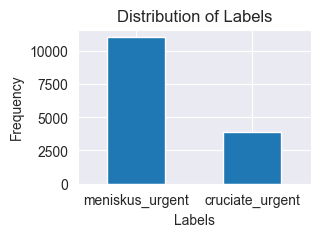

In [4]:
import pandas as pd

data_label = "data"
predict_label = "label"
balanced = False
labels = ["meniskus_urgent", "cruciate_urgent"]
class_weights = False
sample_weights = False
df = pd.read_csv('../data/balanced_classification_dataset.csv')

train_padded, valid_padded, test_padded, train_labels, valid_labels, test_labels, label_encoder, num_classes, max_length, word_index, class_weights, sample_weights = get_train_test_data(df, data_label, predict_label, balanced=balanced, lables=labels, class_weights=class_weights, sample_weights=sample_weights)


In [5]:
# Define model parameters
embedding_dim = 300  # Dimension of the embedding vectors
lstm_units = 64  # Number of LSTM units
optimizer = Adam()
loss = tf.keras.losses.CategoricalCrossentropy()
epochs = 10
batch_size = 64
metrics=[
      tf.keras.metrics.CategoricalAccuracy(name='accuracy'),
      tf.keras.metrics.AUC(name='auc'),
      tf.keras.metrics.F1Score(name='f1_score'),
]

2024-07-21 12:10:12.660950: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Max
2024-07-21 12:10:12.660983: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 64.00 GB
2024-07-21 12:10:12.660992: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 24.00 GB
2024-07-21 12:10:12.661016: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-21 12:10:12.661035: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [22]:
# Define the input layer
input_text = Input(shape=(max_length,), dtype='int32', name='text_input')

# Embedding layer
embedding = Embedding(input_dim=len(word_index), output_dim=embedding_dim)(input_text)

# Two LSTM layers
x = Bidirectional(LSTM(units=64, return_sequences=True))(embedding)
x = Dropout(0.5)(x)
x = Bidirectional(LSTM(units=32, return_sequences=True))(embedding)
x = Dropout(0.5)(x)
x = Bidirectional(LSTM(units=16, return_sequences=True))(embedding)
x = Dropout(0.5)(x)
x = Bidirectional(LSTM(units=8))(embedding)


# Output layer
output = Dense(num_classes, activation='softmax')(x)

# Define the model
model = Model(inputs=input_text, outputs=output)

# Compile the model
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [5]:
history = model.fit(train_padded, train_labels, epochs=1, batch_size=32,
                    validation_data=(valid_padded, valid_labels))

2024-07-21 12:05:10.855241: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


468/468 ━━━━━━━━━━━━━━━━━━━━ 51s 103ms/step - accuracy: 0.7975 - auc: 0.8831 - f1_score: 0.6783 - loss: 0.4234 - val_accuracy: 0.8589 - val_auc: 0.9333 - val_f1_score: 0.8226 - val_loss: 0.3276


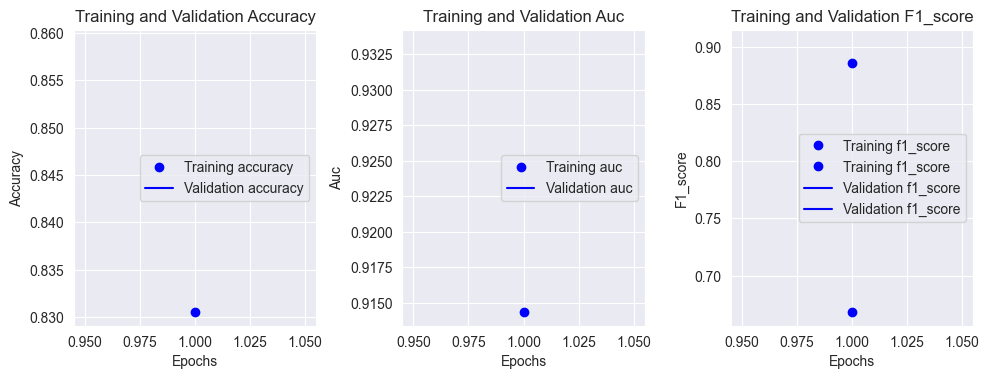

156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step


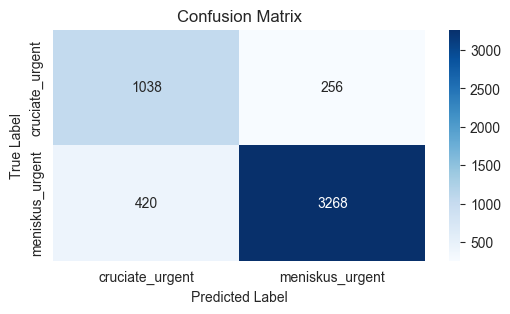

TypeError: can only concatenate str (not "numpy.float64") to str

In [6]:
eval_training(history, metrics)
eval(model, test_padded, test_labels, label_encoder)

In [6]:
# Define the input layer
input_text = Input(shape=(max_length,), dtype='int32', name='text_input2')

# Embedding layer
embedding = Embedding(input_dim=len(word_index), output_dim=embedding_dim)(input_text)

# Two LSTM layers
x = LSTM(units=64, return_sequences=True)(embedding)
x = Dropout(0.5)(x)
x = LSTM(units=32, return_sequences=True)(embedding)
x = Dropout(0.5)(x)
x = LSTM(units=16, return_sequences=True)(embedding)
x = Dropout(0.5)(x)
x = LSTM(units=8)(embedding)


# Output layer
output = Dense(num_classes, activation='softmax')(x)

# Define the model
model = Model(inputs=input_text, outputs=output)

# Compile the model
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [7]:
history = model.fit(train_padded, train_labels, epochs=1, batch_size=32,
                    validation_data=(valid_padded, valid_labels))

2024-07-21 12:10:24.061575: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


468/468 ━━━━━━━━━━━━━━━━━━━━ 26s 52ms/step - accuracy: 0.7355 - auc: 0.7350 - f1_score: 0.4315 - loss: 0.5762 - val_accuracy: 0.7403 - val_auc: 0.7403 - val_f1_score: 0.4254 - val_loss: 0.5729


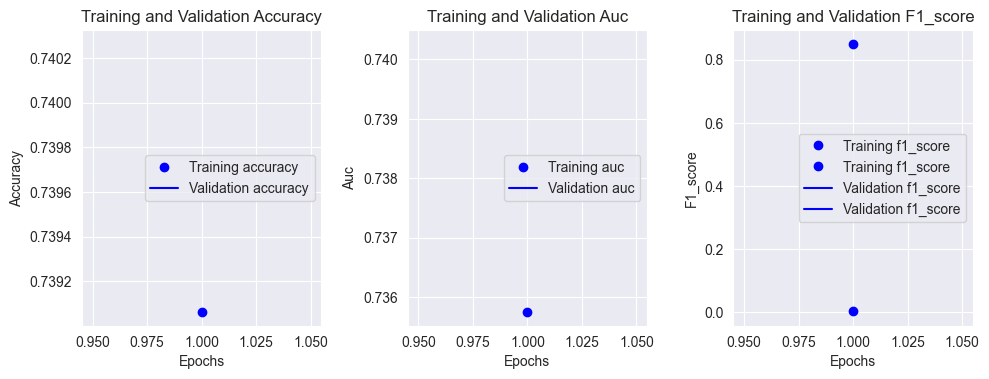

156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


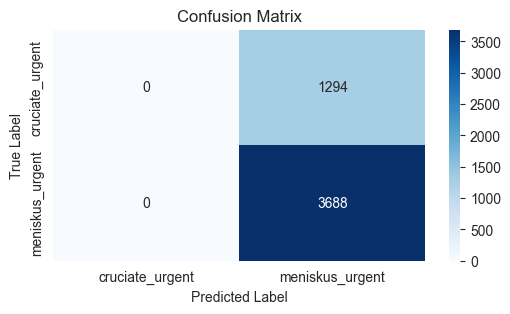

TypeError: can only concatenate str (not "numpy.float64") to str

In [8]:
eval_training(history, metrics)
eval(model, test_padded, test_labels, label_encoder)

In [9]:

# Define the input layer
input_text = Input(shape=(max_length,), dtype='int32', name='text_input')

# Embedding layer
embedding = Embedding(input_dim=len(word_index), output_dim=embedding_dim)(input_text)

# Two LSTM layers
x = Bidirectional(LSTM(units=64, return_sequences=True))(embedding)
x = Dropout(0.5)(x)
x = Bidirectional(LSTM(units=32, return_sequences=True))(embedding)
x = Dropout(0.5)(x)
x = Bidirectional(LSTM(units=16, return_sequences=True))(embedding)
x = Dropout(0.5)(x)
x = Bidirectional(LSTM(units=8))(embedding)

# Output layer
output = Dense(num_classes, activation='softmax')(x)

# Define the model
model = Model(inputs=input_text, outputs=output)

# Compile the model
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [10]:
history = model.fit(train_padded, train_labels, epochs=1, batch_size=32,
                    validation_data=(valid_padded, valid_labels))

ValueError: Unknown variable: <KerasVariable shape=(26793, 300), dtype=float32, path=embedding_1/embeddings>. This optimizer can only be called for the variables it was originally built with. When working with a new set of variables, you should recreate a new optimizer instance.

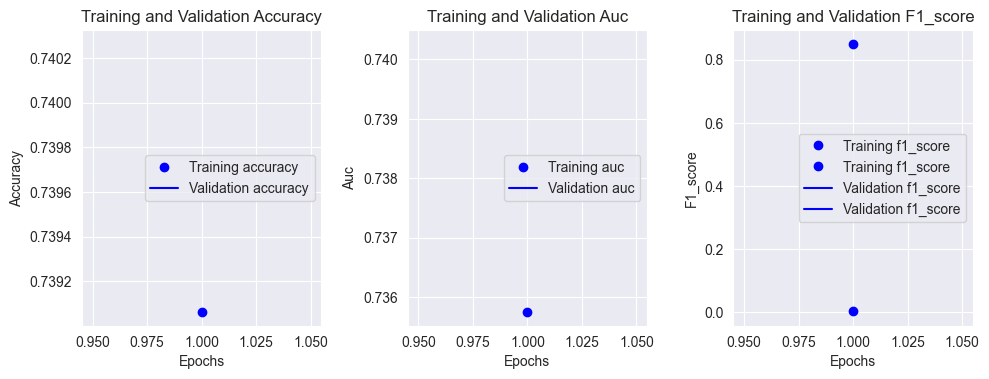

156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step


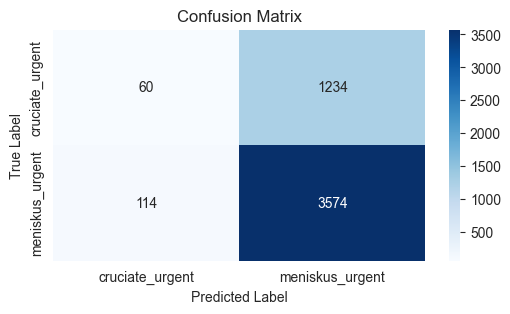

TypeError: can only concatenate str (not "numpy.float64") to str

In [11]:
eval_training(history, metrics)
eval(model, test_padded, test_labels, label_encoder)